# Mini-Project: Analyzing Global Air Quality and Health Data
Objective: To explore the relationship between air quality and public health across different countries.

Data sets: 

Air quality e.g., World Air Quality Index (AQI)

Health records e.g., from WHO


* Retrieve the data
* Clean the data
* Integrate the data
* Perform exploratory data analysis (EDA) to understand trends and patterns.
* Investigate correlations between air quality indices and health indicators.
* Summarize key insights and trends observed from the integrated dataset.


In [8]:
import pandas as pd
import numpy as np

aqi_data = pd.read_csv('AQI_Data.csv')
country_data = pd.read_csv('world-data-2023.csv')

In [9]:
aqi_data.head()


,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


In [10]:
country_data.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [11]:
health_data = country_data[['Country', 'Life expectancy', 'Birth Rate', 'Out of pocket health expenditure', 'Physicians per thousand', 'Population', 'Maternal mortality ratio']]

health_data.head()

,Country,Life expectancy,Birth Rate,Out of pocket health expenditure,Physicians per thousand,Population,Maternal mortality ratio
0,Afghanistan,64.5,32.49,78.40%,0.28,"38,041,754",638.0
1,Albania,78.5,11.78,56.90%,1.20,"2,854,191",15.0
2,Algeria,76.7,24.28,28.10%,1.72,"43,053,054",112.0
3,Andorra,NaN,7.20,36.40%,3.33,"77,142",NaN
4,Angola,60.8,40.73,33.40%,0.21,"31,825,295",241.0


In [14]:
# Average AQI for each country by year
aqi_data_grouped = aqi_data.groupby('Country')['AQI Value'].mean()
aqi_data_grouped.head()

Country
Albania       26.150538
Algeria       61.902174
Andorra       31.182796
Angola       109.462366
Argentina     35.946237
Name: AQI Value, dtype: float64

In [15]:
# merge aqi_data_grouped with health_data
merged_data = pd.merge(health_data, aqi_data_grouped, on='Country')
merged_data.head()

,Country,Life expectancy,Birth Rate,Out of pocket health expenditure,Physicians per thousand,Population,Maternal mortality ratio,AQI Value
0,Albania,78.5,11.78,56.90%,1.20,"2,854,191",15.0,26.150538
1,Algeria,76.7,24.28,28.10%,1.72,"43,053,054",112.0,61.902174
2,Andorra,NaN,7.20,36.40%,3.33,"77,142",NaN,31.182796
3,Angola,60.8,40.73,33.40%,0.21,"31,825,295",241.0,109.462366
4,Argentina,76.5,17.02,17.60%,3.96,"44,938,712",39.0,35.946237


In [16]:
# Perform EDA
merged_data.describe()


,Life expectancy,Birth Rate,Physicians per thousand,Maternal mortality ratio,AQI Value
count,118.000000,120.000000,119.000000,116.000000,120.000000
mean,74.404237,17.416167,2.309580,103.129310,66.578036
std,6.918208,9.035591,1.636547,188.362303,37.741577
min,52.800000,5.900000,0.040000,2.000000,11.634409
25%,71.250000,10.100000,0.840000,8.000000,35.804122
50%,75.400000,14.440000,2.290000,26.000000,61.859689
75%,80.075000,21.822500,3.370000,113.750000,83.570513
max,85.400000,42.170000,7.120000,1140.000000,184.526882


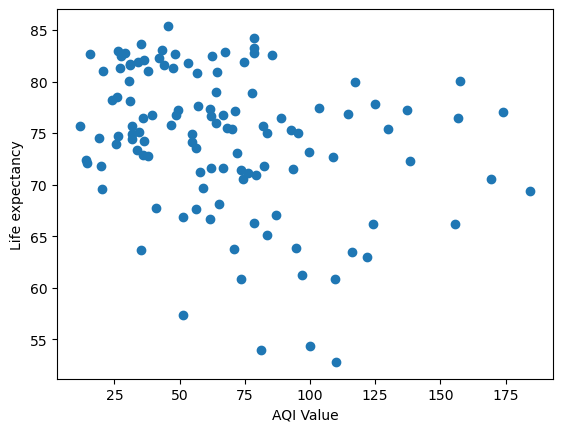

In [19]:
# Plot the data
import matplotlib.pyplot as plt
import seaborn as sns

# sns.pairplot(merged_data[['Life expectancy', 'AQI Value']])
# plt.show()

# plot relation btn AQI and Life expectancy
plt.scatter(merged_data['AQI Value'], merged_data['Life expectancy'])
plt.xlabel('AQI Value')
plt.ylabel('Life expectancy')
plt.show()

